# KNN Implementation

1. [Videos of different values of k](https://www.youtube.com/watch?v=gdS0V35GqgQ)
2. [Video describing nearest neighbors](http://videolectures.net/aaai07_bosch_knnc/)
3. [Probably the best explanation of nearest neighbors](https://alliance.seas.upenn.edu/~cis520/dynamic/2016/wiki/index.php?n=Lectures.LocalLearning)

In [207]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(seed=0)
sns.set()

In [208]:
def generate_data(N):
    # Data generation
    #data of Gaussian Distributions
    #distribution 1
    mu1 = [2, 2]
    sigma1 = [[5, 0], [0, 5]] # Notice the 0 covariance
    x1, y1 = np.random.multivariate_normal(mu1, sigma1, N).T

    #distribution 2
    mu2 = [-2, -2]
    sigma2 = [[3, 0], [0, 3]] # Notice the 0 covariance
    x2, y2 = np.random.multivariate_normal(mu2, sigma2, N).T
    return x1, y1, x2, y2

In [209]:
def euc_dist(data_x, data_y, test_x, test_y):
    '''
    Takes the data_set and the new point as input.
    Returns a list containing the distance from the new point to all the points in the dataset
    '''    
    dist = np.random.rand(data_x.shape[0]) # initialize a random list of the same size as the number of points in the data_set    
    for i in range(dist.shape[0]): 
        a = np.array([data_x[i], data_y[i]])
        b = np.array([test_x, test_y])
        dist[i] = np.linalg.norm(a-b) # np.sqrt( (test_y - data_y[i])**2 + (test_x - data_x[i])**2 ) # distance between point i and new_pt
    return dist      

In [210]:
def assign_class(data_class, indices):
    '''
    Function to assign a class to the new point based on the classes of the k closest points
    Takes the data_set and the list of k indics as input. 
    The indices are the positions of the nearest neighbors in the dataset.
    '''
    count_class = [0,0] # Position 0 = number of nearest neighbors having class 0. Position 1 = number of nearest neighbors having class 1.
    for i in indices:
        count_class[int(data_class[i])] += 1
    return np.argmax(count_class)        

In [211]:
def knn(data_x, data_y, data_class, test_x, test_y,  k=1):
    '''
    Takes the new point and k as input. 
    Calculates it's euclidean distance to all the existing points.
    Take the k closest points.
    the class that occures maximum number of times get's assigned to the new point.
    '''
    dist = euc_dist(data_x, data_y, test_x, test_y)
    indices = dist.argsort()[:k] # argsort() is a numpy function that Returns the indices that would sort this array. We are taking the first k indices.
    c = assign_class(data_class, indices)
    return c # np.append(data_set,[[new_pt[0], new_pt[1],c]], axis = 0), c    # returns the new point with the assigned class

In [212]:
N = 100
x1, y1, x2, y2 = generate_data(N)
data_x = np.hstack((x1,x2))
data_y = np.hstack((y1,y2))
data_class = np.hstack((np.zeros(N), np.ones(N)))

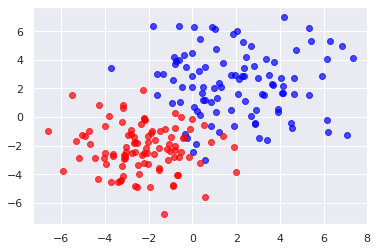

In [225]:
# plotting training data
plt.scatter(x1, y1, alpha=0.7, c = 'blue')
plt.scatter(x2, y2, alpha=0.7, c = 'red')
plt.show() 

In [213]:
# Our 2-dimensional distribution will be over variables X and Y
X = np.linspace(-8, 8, N)
Y = np.linspace(-8, 8, N)
X, Y = np.meshgrid(X, Y)

In [288]:
K = 1
Z = np.array([ knn(data_x, data_y, data_class, xx, yy,  k=K) for xx, yy in zip(np.ravel(X), np.ravel(Y)) ])
Z = Z.reshape(X.shape)
#cnt = plt.contour(X,Y,Z, 1, alpha = 0.5, colors = ('green'))

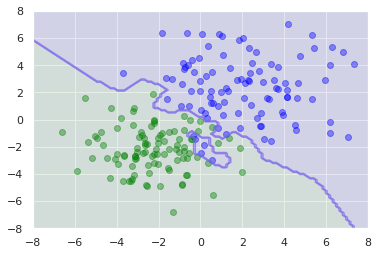

In [291]:
plt.contourf(X,Y,Z, 1, colors = ('darkblue','darkgreen'),  alpha = 0.1)
plt.contour(X,Y,Z, 1, colors = ('mediumslateblue'),  alpha = 0.7)
plt.scatter(x1, y1, alpha = .4, c = 'blue')
plt.scatter(x2, y2, alpha = .4, c = 'green')
#plt.savefig('k_plot.png', dpi = 1000)
plt.show() 